In [1]:
'''
AUTOMATIC DATA AUGMENTATION:
4’modo: utilizzando 4 trasformazioni: Resize, CenterCrop, ColorJitter, ToTensor
''' 

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt 
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F 
from torchvision import datasets, transforms

#percorso per accedere alla subdirectory "base"
data_dir = './base/' 
 

#transforms.Compose(transforms): combina le trasformazioni, in una pipeline di trasformazioni
#le operazioni di trasformazione vengono applicate alle immagini originali, non invariando il dataset originale

#transforms.Resize(size): permette di ridimensionare l'immagine in input, alla dimensione data
#parametro "size(sequence or int)”: dimensione di output desiderata per il ridimensionamento 

#transforms.CenterCrop(size): permette di ritagliare l'immagine al centro
#parametro "size(sequence or int)": dimensione di output desiderata per il ritaglio

#transforms.ColorJitter(brightness): permette di cambiare, in modo casuale, la luminosità di un’immagine
#parametro “brightness(float)”: luminosità 

#transforms.ToTensor(): converte le immagini in un tensore
transform = transforms.Compose([transforms.Resize(512),
                                transforms.CenterCrop(512),
                                transforms.ColorJitter(brightness=0.6),
                                transforms.ToTensor()])


#ImageFolder(root, transform): cartella di immagini, in cui è possibile definire alcune trasformazioni
#parametro “root”: root directory path (percorso della directory principale)
#parametro “transform”: trasformazione che accetta un'immagine e restituisce una versione trasformata
dataset = datasets.ImageFolder(data_dir, transform=transform)


#DataLoader(dataset, batch_size, shuffle): caricatore di dati, in cui si otterranno le immagini ed etichette
#parametro “dataset”: dataset da cui caricare i dati
#parametro “batch_size”: dimensione del batch, ovvero il numero di immagini che si potranno ottenere
#parametro “shuffle(default:False)”: mescola casualmente i dati, ogni volta che si inizia una nuova epoca
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=False)

In [2]:
dataset.classes

['vaso_1', 'vaso_2', 'vaso_3', 'vaso_4', 'vaso_5', 'vaso_6']

In [3]:
dataset.class_to_idx

{'vaso_1': 0, 'vaso_2': 1, 'vaso_3': 2, 'vaso_4': 3, 'vaso_5': 4, 'vaso_6': 5}

In [4]:
dataset

Dataset ImageFolder
    Number of datapoints: 22
    Root location: ./base/
    StandardTransform
Transform: Compose(
               Resize(size=512, interpolation=PIL.Image.BILINEAR)
               CenterCrop(size=(512, 512))
               ColorJitter(brightness=[0.4, 1.6], contrast=None, saturation=None, hue=None)
               ToTensor()
           )

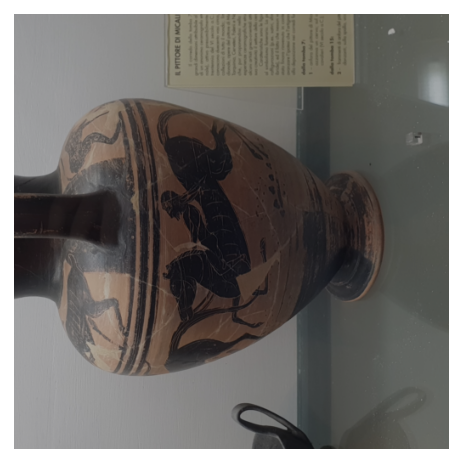

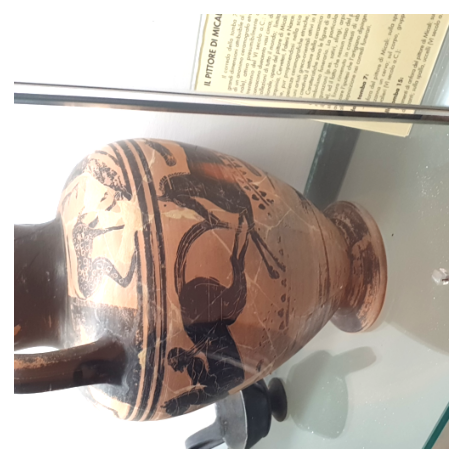

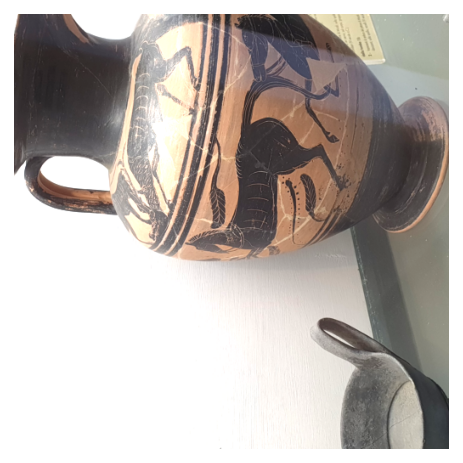

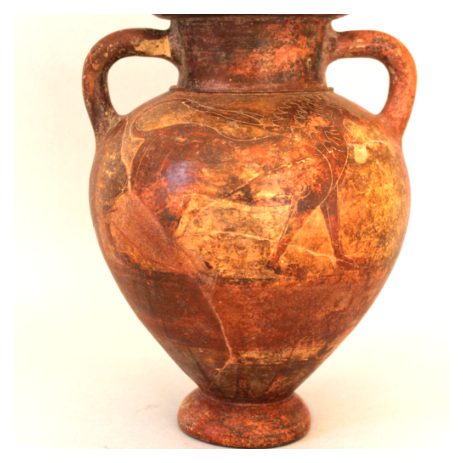

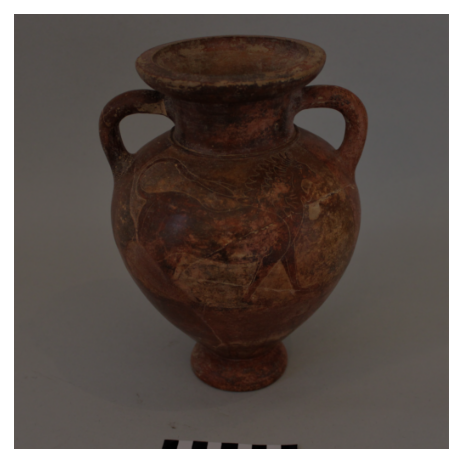

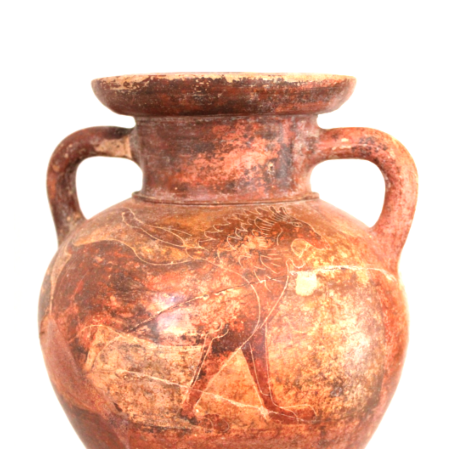

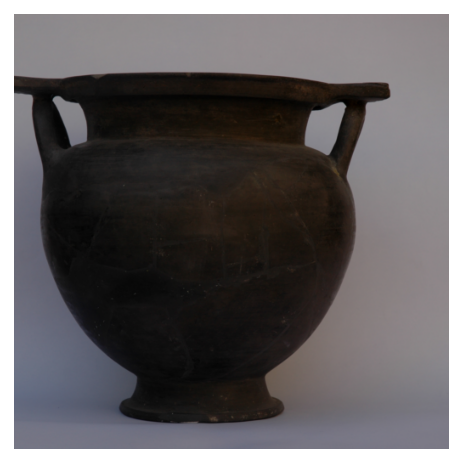

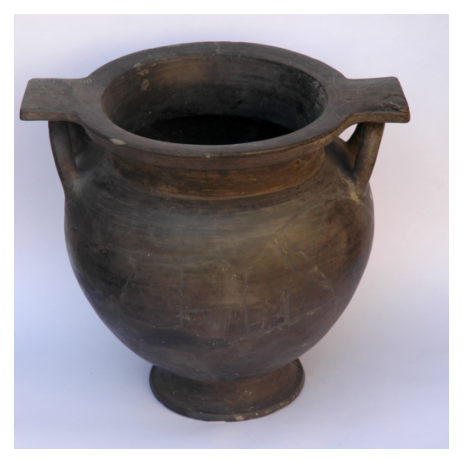

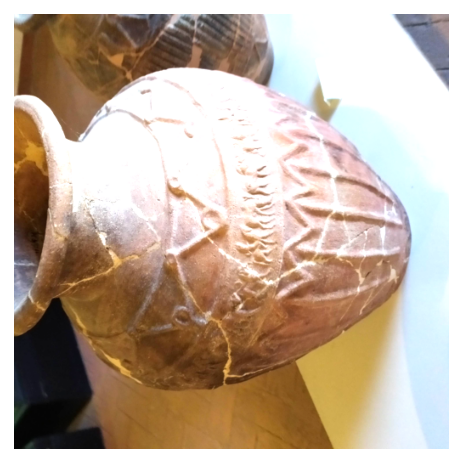

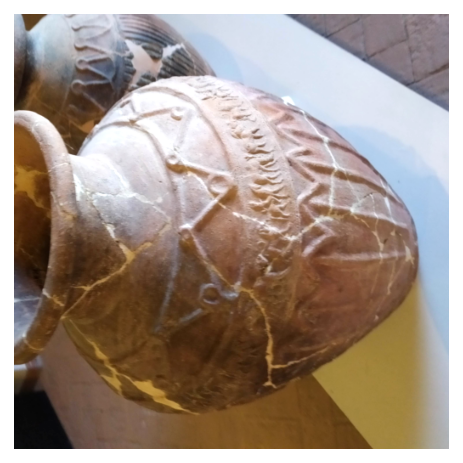

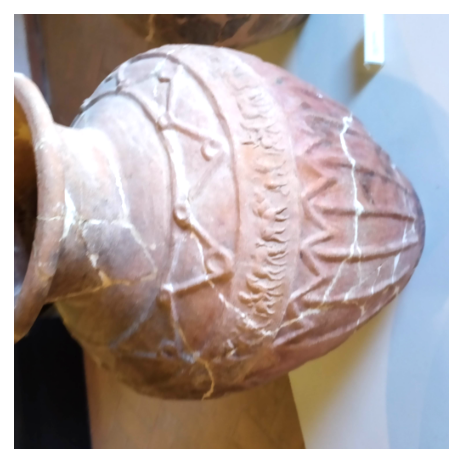

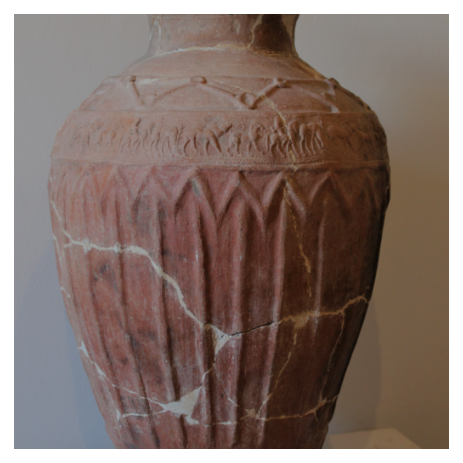

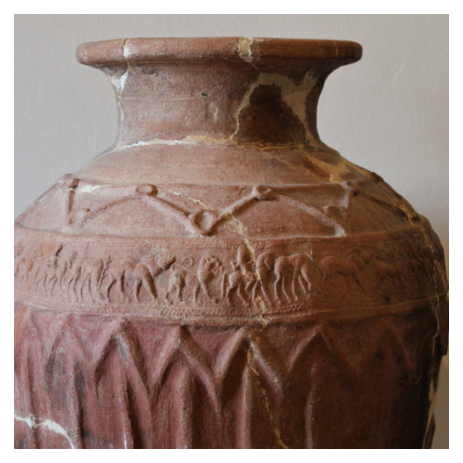

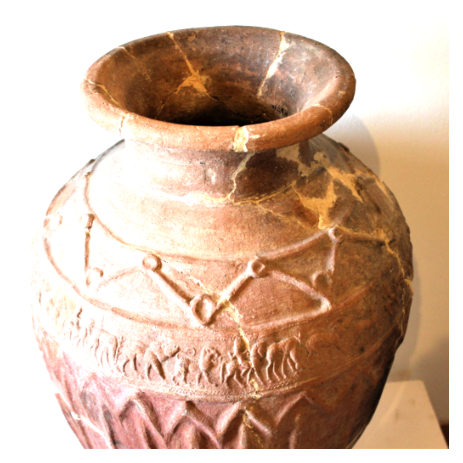

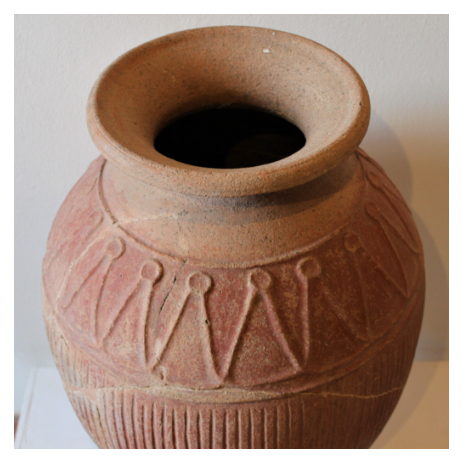

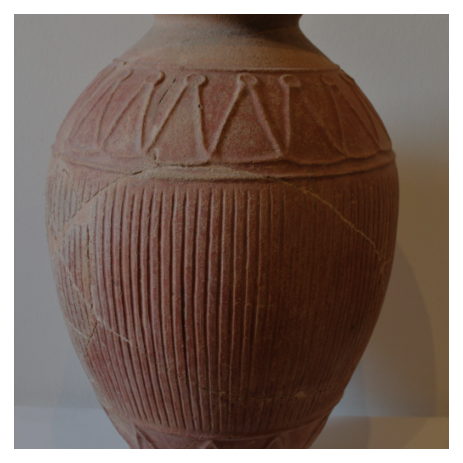

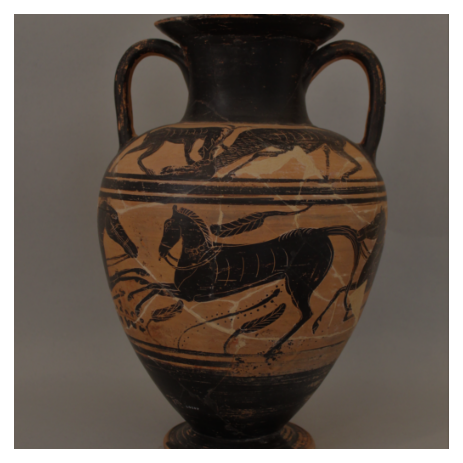

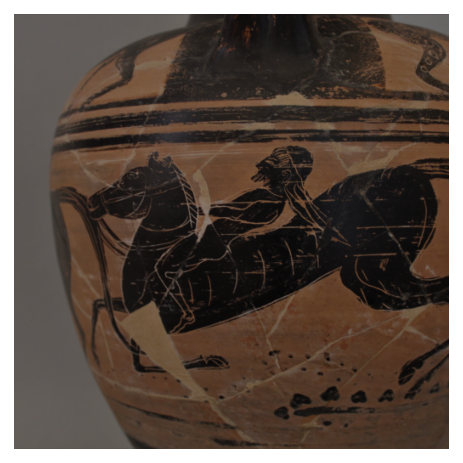

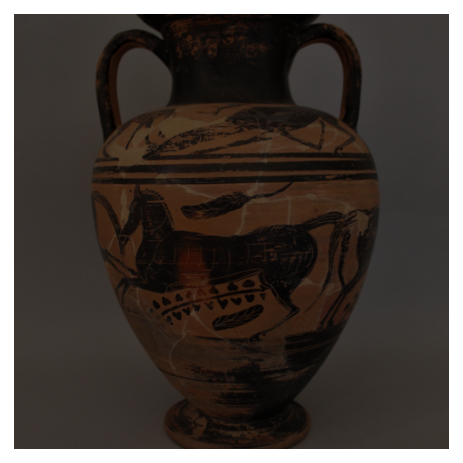

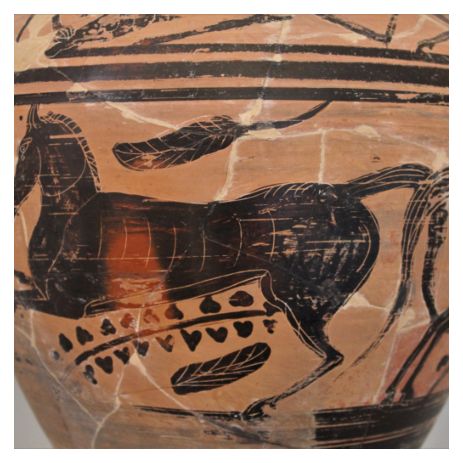

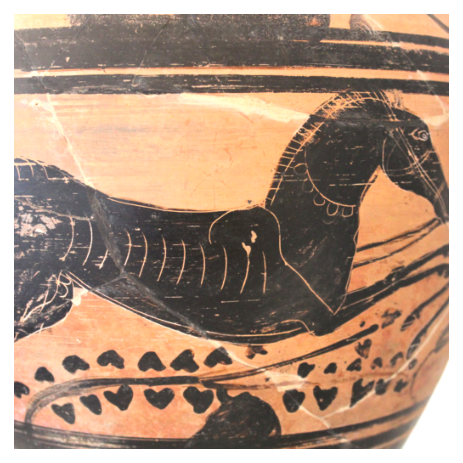

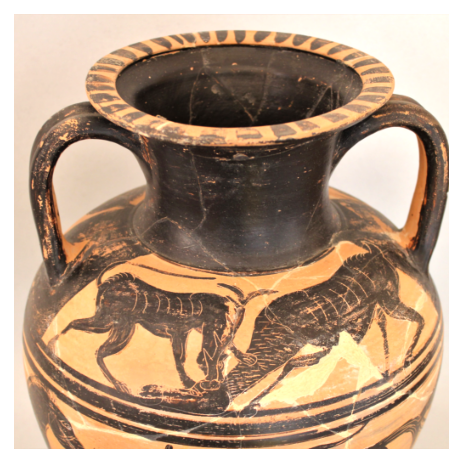

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(image, ax=None):
        if ax is None:
            fig, ax = plt.subplots()
        
	    #numpy().transpose: inverte o permuta gli assi di un array, restituendo l’array modificato(in 3D)
        image = image.numpy().transpose((1, 2, 0)) 
 
        ax.imshow(image)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.tick_params(axis='both', length=0)
        ax.set_xticklabels('')
        ax.set_yticklabels('')
        
        return ax

data_iter = iter(dataloader) #iter: permette di scorrere sul dataloader
images, labels = next(data_iter) #next: permette di ottenere i dati su di esso
for i in range(22):
	imshow(images[i], ax=None) 